In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('train.csv',index_col='date', parse_dates=True)

In [3]:
df

,sleep_hours
date,
2015-02-19,6.400000
2015-02-20,7.583333
2015-02-21,6.350000
2015-02-22,6.500000
2015-02-23,8.916667
...,...
2021-12-25,7.933333
2021-12-26,3.850000
2021-12-29,6.175000


In [4]:
df_tsa = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2354 entries, 2015-02-19 to 2021-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sleep_hours  2354 non-null   float64
dtypes: float64(1)
memory usage: 36.8 KB


In [6]:
test = pd.read_csv('test.csv', parse_dates=['date'])

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         419 non-null    datetime64[ns]
 1   sleep_hours  419 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [8]:
test

,date,sleep_hours
0,2022-01-01,1
1,2022-01-02,1
2,2022-01-03,1
3,2022-01-04,1
4,2022-01-05,1
...,...,...
414,2023-03-12,1
415,2023-03-13,1
416,2023-03-14,1
417,2023-03-15,1


<AxesSubplot:xlabel='date'>

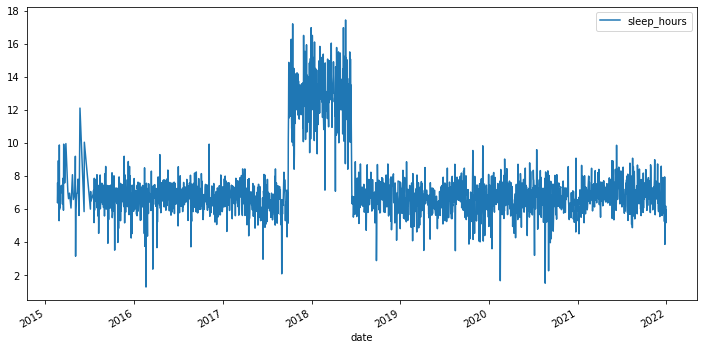

In [9]:
df.plot(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

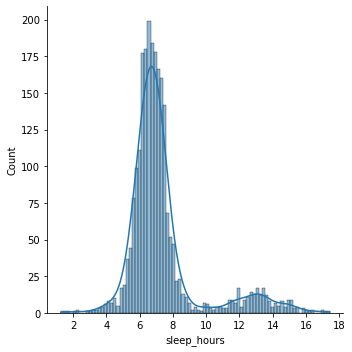

In [10]:
plt.figure(figsize=(12,6))
sns.displot(data=df,x='sleep_hours',kde=True)

In [11]:
pd.qcut(df['sleep_hours'],5,labels=['very less','less','ok','high','very high'])

date
2015-02-19         less
2015-02-20         high
2015-02-21         less
2015-02-22         less
2015-02-23    very high
                ...    
2021-12-25    very high
2021-12-26    very less
2021-12-29         less
2021-12-30    very less
2021-12-31    very less
Name: sleep_hours, Length: 2354, dtype: category
Categories (5, object): ['very less' < 'less' < 'ok' < 'high' < 'very high']

In [12]:
pd.qcut(df['sleep_hours'],5,labels=['very less','less','ok','high','very high']).value_counts()

high         475
less         472
very less    471
ok           470
very high    466
Name: sleep_hours, dtype: int64

In [13]:
pd.qcut(df['sleep_hours'],5).value_counts()

(7.058, 7.683]     475
(6.113, 6.583]     472
(1.266, 6.113]     471
(6.583, 7.058]     470
(7.683, 17.433]    466
Name: sleep_hours, dtype: int64

In [14]:
df['sleep_hours'].describe()

count    2354.000000
mean        7.356560
std         2.213308
min         1.266667
25%         6.235417
50%         6.816667
75%         7.483333
max        17.433333
Name: sleep_hours, dtype: float64

In [15]:
df[df['sleep_hours'] > df['sleep_hours'].mean() + 3*df['sleep_hours'].std()]

,sleep_hours
date,
2017-09-29,14.866667
2017-10-02,14.566667
2017-10-09,16.266667
2017-10-15,17.200000
2017-10-20,14.500000
...,...
2018-05-21,17.433333
2018-05-23,15.133333
2018-05-26,15.033333


In [16]:
df.reset_index(inplace=True)

In [17]:
df

,date,sleep_hours
0,2015-02-19,6.400000
1,2015-02-20,7.583333
2,2015-02-21,6.350000
3,2015-02-22,6.500000
4,2015-02-23,8.916667
...,...,...
2349,2021-12-25,7.933333
2350,2021-12-26,3.850000
2351,2021-12-29,6.175000
2352,2021-12-30,5.158333


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2354 non-null   datetime64[ns]
 1   sleep_hours  2354 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.9 KB


In [19]:
df.isna().sum()

date           0
sleep_hours    0
dtype: int64

In [20]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['dow'] = df['date'].dt.day_name()

In [21]:
df

,date,sleep_hours,year,month,day,dow
0,2015-02-19,6.400000,2015,2,19,Thursday
1,2015-02-20,7.583333,2015,2,20,Friday
2,2015-02-21,6.350000,2015,2,21,Saturday
3,2015-02-22,6.500000,2015,2,22,Sunday
4,2015-02-23,8.916667,2015,2,23,Monday
...,...,...,...,...,...,...
2349,2021-12-25,7.933333,2021,12,25,Saturday
2350,2021-12-26,3.850000,2021,12,26,Sunday
2351,2021-12-29,6.175000,2021,12,29,Wednesday
2352,2021-12-30,5.158333,2021,12,30,Thursday


In [22]:
df.groupby('dow').median()['sleep_hours'].sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_16868\1097586490.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('dow').median()['sleep_hours'].sort_values(ascending=False)


dow
Saturday     7.137500
Sunday       6.966667
Friday       6.933333
Thursday     6.800000
Wednesday    6.683333
Tuesday      6.625000
Monday       6.608333
Name: sleep_hours, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2354 non-null   datetime64[ns]
 1   sleep_hours  2354 non-null   float64       
 2   year         2354 non-null   int64         
 3   month        2354 non-null   int64         
 4   day          2354 non-null   int64         
 5   dow          2354 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 110.5+ KB


In [24]:
df2 = df.copy()

In [25]:
df2  = pd.get_dummies(df2,columns=['dow'],drop_first=False)

In [26]:
df2

,date,sleep_hours,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,2015-02-19,6.400000,2015,2,19,0,0,0,0,1,0,0
1,2015-02-20,7.583333,2015,2,20,1,0,0,0,0,0,0
2,2015-02-21,6.350000,2015,2,21,0,0,1,0,0,0,0
3,2015-02-22,6.500000,2015,2,22,0,0,0,1,0,0,0
4,2015-02-23,8.916667,2015,2,23,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2021-12-25,7.933333,2021,12,25,0,0,1,0,0,0,0
2350,2021-12-26,3.850000,2021,12,26,0,0,0,1,0,0,0
2351,2021-12-29,6.175000,2021,12,29,0,0,0,0,0,0,1
2352,2021-12-30,5.158333,2021,12,30,0,0,0,0,1,0,0


# PREPROCESSING TRAIN AND TEST DATA

## First approach: Keep year and month as numerical
## Second approach: Treat year and month as categorical

### First Apprach

In [27]:
df3 = df2.drop('date',axis=1).copy()

In [28]:
df3

,sleep_hours,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,6.400000,2015,2,19,0,0,0,0,1,0,0
1,7.583333,2015,2,20,1,0,0,0,0,0,0
2,6.350000,2015,2,21,0,0,1,0,0,0,0
3,6.500000,2015,2,22,0,0,0,1,0,0,0
4,8.916667,2015,2,23,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2349,7.933333,2021,12,25,0,0,1,0,0,0,0
2350,3.850000,2021,12,26,0,0,0,1,0,0,0
2351,6.175000,2021,12,29,0,0,0,0,0,0,1
2352,5.158333,2021,12,30,0,0,0,0,1,0,0


In [29]:
X = df3.drop(['sleep_hours'],axis=1)
y = df3['sleep_hours']

In [30]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
X_train.shape

(1577, 10)

## Preprocessing test data

In [33]:
test.drop('sleep_hours',axis=1,inplace=True)

In [34]:
test['year'] = test['date'].apply(lambda x: x.year)
test['month'] = test['date'].apply(lambda x: x.month)
test['day'] = test['date'].apply(lambda x: x.day)
test['dow'] = test['date'].dt.day_name()

In [35]:
test

,date,year,month,day,dow
0,2022-01-01,2022,1,1,Saturday
1,2022-01-02,2022,1,2,Sunday
2,2022-01-03,2022,1,3,Monday
3,2022-01-04,2022,1,4,Tuesday
4,2022-01-05,2022,1,5,Wednesday
...,...,...,...,...,...
414,2023-03-12,2023,3,12,Sunday
415,2023-03-13,2023,3,13,Monday
416,2023-03-14,2023,3,14,Tuesday
417,2023-03-15,2023,3,15,Wednesday


In [36]:
test = pd.get_dummies(test,columns=['dow'],drop_first=False)

In [37]:
test

,date,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,2022-01-01,2022,1,1,0,0,1,0,0,0,0
1,2022-01-02,2022,1,2,0,0,0,1,0,0,0
2,2022-01-03,2022,1,3,0,1,0,0,0,0,0
3,2022-01-04,2022,1,4,0,0,0,0,0,1,0
4,2022-01-05,2022,1,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
414,2023-03-12,2023,3,12,0,0,0,1,0,0,0
415,2023-03-13,2023,3,13,0,1,0,0,0,0,0
416,2023-03-14,2023,3,14,0,0,0,0,0,1,0
417,2023-03-15,2023,3,15,0,0,0,0,0,0,1


In [38]:
test.drop('date',axis=1,inplace=True)

In [39]:
test

,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,2022,1,1,0,0,1,0,0,0,0
1,2022,1,2,0,0,0,1,0,0,0
2,2022,1,3,0,1,0,0,0,0,0
3,2022,1,4,0,0,0,0,0,1,0
4,2022,1,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
414,2023,3,12,0,0,0,1,0,0,0
415,2023,3,13,0,1,0,0,0,0,0
416,2023,3,14,0,0,0,0,0,1,0
417,2023,3,15,0,0,0,0,0,0,1


In [40]:
X_train

,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
1135,2018,7,31,0,0,0,0,0,1,0
37,2015,5,15,1,0,0,0,0,0,0
123,2015,10,2,1,0,0,0,0,0,0
2046,2021,2,19,1,0,0,0,0,0,0
394,2016,7,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1638,2019,12,30,0,1,0,0,0,0,0
1095,2018,6,21,0,0,0,0,1,0,0
1130,2018,7,26,0,0,0,0,1,0,0
1294,2019,1,15,0,0,0,0,0,1,0


## Using flaml

In [41]:
from flaml import AutoML

In [42]:
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 30,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
}

In [43]:
automl.fit(X_train=X_train, y_train=y_train,**automl_settings)

[flaml.automl.automl: 03-24 01:01:52] {2726} INFO - task = regression
[flaml.automl.automl: 03-24 01:01:52] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-24 01:01:52] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-24 01:01:52] {2858} INFO - Minimizing error metric: rmse
[flaml.automl.automl: 03-24 01:01:52] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-24 01:01:52] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-24 01:01:53] {3472} INFO - Estimated sufficient time budget=2483s. Estimated necessary time budget=21s.
[flaml.automl.automl: 03-24 01:01:53] {3519} INFO -  at 0.4s,	estimator lgbm's best error=1.9939,	best estimator lgbm's best error=1.9939
[flaml.automl.automl: 03-24 01:01:53] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-24 01:01:53] {3519} INFO -  at 0.6s,	estimator lgbm's best error=1.9939,	b

C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. 

[flaml.automl.automl: 03-24 01:02:20] {3519} INFO -  at 28.2s,	estimator catboost's best error=1.1500,	best estimator rf's best error=1.1116
[flaml.automl.automl: 03-24 01:02:20] {3334} INFO - iteration 57, current learner rf
[flaml.automl.automl: 03-24 01:02:21] {3519} INFO -  at 28.6s,	estimator rf's best error=1.1116,	best estimator rf's best error=1.1116
[flaml.automl.automl: 03-24 01:02:21] {3334} INFO - iteration 58, current learner rf
[flaml.automl.automl: 03-24 01:02:21] {3519} INFO -  at 29.4s,	estimator rf's best error=1.1046,	best estimator rf's best error=1.1046
[flaml.automl.automl: 03-24 01:02:21] {3334} INFO - iteration 59, current learner extra_tree
[flaml.automl.automl: 03-24 01:02:22] {3519} INFO -  at 29.8s,	estimator extra_tree's best error=1.1614,	best estimator rf's best error=1.1046
[flaml.automl.automl: 03-24 01:02:22] {3334} INFO - iteration 60, current learner xgb_limitdepth
[flaml.automl.automl: 03-24 01:02:22] {3519} INFO -  at 30.1s,	estimator xgb_limitdept

In [44]:
automl.best_estimator

'rf'

In [45]:
automl.best_loss_per_estimator

{'lgbm': 1.2054733340347417,
 'rf': 1.1046480536466659,
 'catboost': 1.1499801180066684,
 'xgboost': 1.2872999823758637,
 'extra_tree': 1.1613893082712319,
 'xgb_limitdepth': 2.135782150518628}

In [46]:
automl.best_config_per_estimator['catboost']

{'early_stopping_rounds': 10,
 'learning_rate': 0.09999999999999996,
 'n_estimators': 41}

### 1) CatBoost

In [47]:
from catboost import CatBoostRegressor

In [48]:
cb = CatBoostRegressor(iterations=1000, early_stopping_rounds=30, learning_rate = 0.05, random_state=42,use_best_model=True)
cb.fit(X_train,y_train,eval_set=(X_test,y_test), verbose=100)
cb_pred = cb.predict(X_test)
print(mean_squared_error(y_test,cb_pred)**0.5)
print(mean_absolute_percentage_error(y_test,cb_pred))
print(r2_score(y_test,cb_pred))

C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 2.1507904	test: 2.1252523	best: 2.1252523 (0)	total: 1.92ms	remaining: 1.91s
100:	learn: 1.0626958	test: 1.0737788	best: 1.0737788 (100)	total: 202ms	remaining: 1.79s
200:	learn: 0.9688089	test: 1.0372246	best: 1.0372246 (200)	total: 386ms	remaining: 1.53s
300:	learn: 0.9070579	test: 1.0306946	best: 1.0306882 (294)	total: 563ms	remaining: 1.31s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 1.030688177
bestIteration = 294

Shrink model to first 295 iterations.
1.0306881791471743
0.10816871346039982
0.7796809624171787


In [49]:
pd.Series(cb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

year             68.533316
month            25.958341
day               3.201890
dow_Saturday      0.588488
dow_Monday        0.480077
dow_Sunday        0.323516
dow_Tuesday       0.315847
dow_Friday        0.256781
dow_Wednesday     0.216699
dow_Thursday      0.125046
dtype: float64

### cb1 better than cb2 (RMSE basis)

In [50]:
cb_full_1 = CatBoostRegressor(iterations=1000, early_stopping_rounds=30, learning_rate = 0.05, random_state=42)

In [51]:
cb_full_1.fit(X,y,verbose=100)

0:	learn: 2.1414797	total: 2.29ms	remaining: 2.29s


C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


100:	learn: 1.0487568	total: 199ms	remaining: 1.77s
200:	learn: 0.9796001	total: 373ms	remaining: 1.48s
300:	learn: 0.9300104	total: 554ms	remaining: 1.28s
400:	learn: 0.8896906	total: 753ms	remaining: 1.12s
500:	learn: 0.8509325	total: 950ms	remaining: 946ms
600:	learn: 0.8213017	total: 1.14s	remaining: 760ms
700:	learn: 0.7928055	total: 1.31s	remaining: 561ms
800:	learn: 0.7659069	total: 1.49s	remaining: 371ms
900:	learn: 0.7430080	total: 1.67s	remaining: 183ms
999:	learn: 0.7209810	total: 1.84s	remaining: 0us


In [52]:
test

,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,2022,1,1,0,0,1,0,0,0,0
1,2022,1,2,0,0,0,1,0,0,0
2,2022,1,3,0,1,0,0,0,0,0
3,2022,1,4,0,0,0,0,0,1,0
4,2022,1,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
414,2023,3,12,0,0,0,1,0,0,0
415,2023,3,13,0,1,0,0,0,0,0
416,2023,3,14,0,0,0,0,0,1,0
417,2023,3,15,0,0,0,0,0,0,1


In [53]:
test['sleep_hours'] = cb_full_1.predict(test)

C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [54]:
test

,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,sleep_hours
0,2022,1,1,0,0,1,0,0,0,0,6.380976
1,2022,1,2,0,0,0,1,0,0,0,6.181323
2,2022,1,3,0,1,0,0,0,0,0,6.200406
3,2022,1,4,0,0,0,0,0,1,0,6.096843
4,2022,1,5,0,0,0,0,0,0,1,5.750057
...,...,...,...,...,...,...,...,...,...,...,...
414,2023,3,12,0,0,0,1,0,0,0,7.719243
415,2023,3,13,0,1,0,0,0,0,0,7.073487
416,2023,3,14,0,0,0,0,0,1,0,6.568965
417,2023,3,15,0,0,0,0,0,0,1,6.963856


In [55]:
sub = pd.read_csv('sample_submission.csv')

In [56]:
sub['sleep_hours'] = cb_full_1.predict(test)

C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [57]:
#sub.to_csv('cb_1.csv',index=False)

### Using Catboost regressor with optuna

In [58]:
import optuna

In [59]:
SAMPLE_RATE = 0.4
RANDOM_SEED = 42
EARLY_STOPPING_ROUND = 100

In [60]:
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 10000
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = RANDOM_SEED
    param['logging_level'] = 'Silent'
    
    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_test.copy(), y_test.copy())],
                  early_stopping_rounds=EARLY_STOPPING_ROUND)
    loss = mean_squared_error(y_test, regressor.predict(X_test.copy()))
    return loss

In [61]:
#sub.to_csv('cb_optuna.csv',index=False)

## Catboost with Optuna performed pathetic!!

## 2) Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor, RandomTreesEmbedding

In [63]:
#RandomTreesEmbedding()

In [64]:
automl.best_model_for_estimator

<bound method AutoML.best_model_for_estimator of AutoML(append_log=False, auto_augment=True, custom_hp={},
       cv_score_agg_func=None, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', fit_kwargs_by_estimator={},
       force_cancel=False, free_mem_ratio=0, hpo_method='auto',
       keep_search_state=False, learner_selector='sample', log_file_name='',
       log_training_metric=False, log_type='better', max_iter=None,
       mem_thres=4294967296, metric='auto', metric_constraints=[],
       min_sample_size=10000, model_history=False, n_concurrent_trials=1,
       n_jobs=-1, n_splits=5, pred_time_limit=inf, preserve_checkpoint=True,
       retrain_full=True, sample=True, ...)>

In [65]:
automl2 = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 30,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
}

In [66]:
automl2.fit(X_train,y_train, **automl_settings)

[flaml.automl.automl: 03-24 01:02:26] {2726} INFO - task = regression
[flaml.automl.automl: 03-24 01:02:26] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-24 01:02:26] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-24 01:02:26] {2858} INFO - Minimizing error metric: rmse
[flaml.automl.automl: 03-24 01:02:26] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-24 01:02:26] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-24 01:02:26] {3472} INFO - Estimated sufficient time budget=3112s. Estimated necessary time budget=27s.
[flaml.automl.automl: 03-24 01:02:26] {3519} INFO -  at 0.4s,	estimator lgbm's best error=1.9939,	best estimator lgbm's best error=1.9939
[flaml.automl.automl: 03-24 01:02:26] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-24 01:02:27] {3519} INFO -  at 0.7s,	estimator lgbm's best error=1.9939,	b

C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. 

[flaml.automl.automl: 03-24 01:02:52] {3519} INFO -  at 25.8s,	estimator catboost's best error=1.1458,	best estimator rf's best error=1.1046
[flaml.automl.automl: 03-24 01:02:52] {3334} INFO - iteration 55, current learner lgbm
[flaml.automl.automl: 03-24 01:02:52] {3519} INFO -  at 26.6s,	estimator lgbm's best error=1.2055,	best estimator rf's best error=1.1046
[flaml.automl.automl: 03-24 01:02:52] {3334} INFO - iteration 56, current learner catboost


C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\ANACONDA\envs\my_env\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. 

[flaml.automl.automl: 03-24 01:02:55] {3519} INFO -  at 29.2s,	estimator catboost's best error=1.1458,	best estimator rf's best error=1.1046
[flaml.automl.automl: 03-24 01:02:55] {3334} INFO - iteration 57, current learner rf
[flaml.automl.automl: 03-24 01:02:56] {3519} INFO -  at 29.9s,	estimator rf's best error=1.1046,	best estimator rf's best error=1.1046
[flaml.automl.automl: 03-24 01:02:56] {3334} INFO - iteration 58, current learner xgb_limitdepth
[flaml.automl.automl: 03-24 01:02:56] {3519} INFO -  at 30.0s,	estimator xgb_limitdepth's best error=5.1718,	best estimator rf's best error=1.1046
[flaml.automl.automl: 03-24 01:02:56] {3783} INFO - retrain rf for 0.2s
[flaml.automl.automl: 03-24 01:02:56] {3790} INFO - retrained model: RandomForestRegressor(max_features=0.8309485929315814, max_leaf_nodes=19,
                      n_estimators=27, n_jobs=-1, random_state=12032022)
[flaml.automl.automl: 03-24 01:02:56] {3034} INFO - fit succeeded
[flaml.automl.automl: 03-24 01:02:56] {30

In [67]:
#automl.predict(test)

In [68]:
automl.best_loss

1.1046480536466659

In [69]:
automl2.best_loss

1.1046480536466659

In [70]:
automl2.best_estimator

'rf'

In [71]:
automl2.best_result

{'pred_time': 4.787698097681218e-05,
 'wall_clock_time': 23.15803027153015,
 'metric_for_logging': {'pred_time': 4.787698097681218e-05},
 'val_loss': 1.1046480536466659,
 'training_iteration': 1,
 'config': {'n_estimators': 27,
  'max_features': 0.8309485929315814,
  'max_leaves': 19},
 'config/n_estimators': 27,
 'config/max_features': 0.8309485929315814,
 'config/max_leaves': 19,
 'experiment_tag': 'exp',
 'time_total_s': 0.6622488498687744}

In [72]:
#sub['sleep_hours'] = automl2.predict(test)

In [73]:
#sub.to_csv('automl_4.csv',index=False)

<AxesSubplot:>

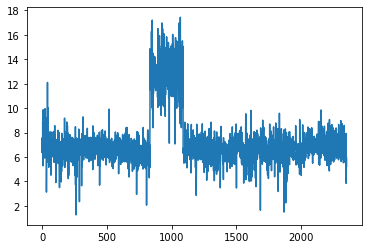

In [74]:
y.plot()

<AxesSubplot:>

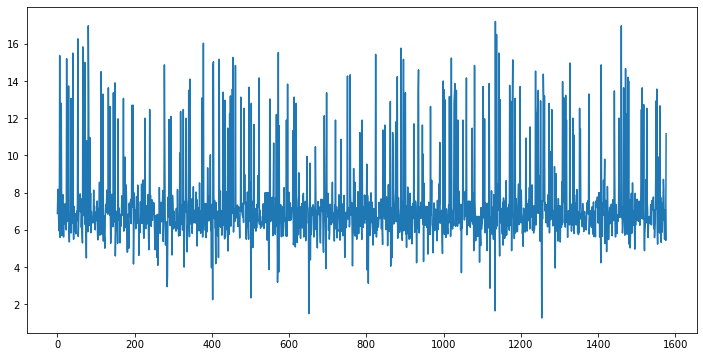

In [75]:
y_train.reset_index()['sleep_hours'].plot(figsize=(12,6))

<AxesSubplot:>

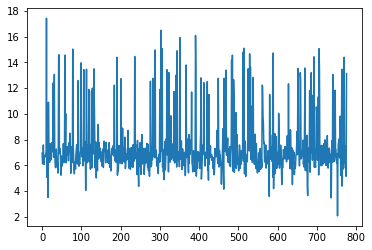

In [76]:
y_test.reset_index()['sleep_hours'].plot()

In [77]:
#df3.to_csv('trained_preprocessed.csv',index=False)

In [78]:
#test.drop('sleep_hours',axis=1).to_csv('test_preprocessed.csv',index=False)